## Part 1: Building a Logistic Regression Model

Recall from the California Housing dataset we used in Linear Regression demo. In this coding example, we will continue to utilize this dataset to analyze the application of a Logistic Regression Model.



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california_housing = fetch_california_housing(as_frame=True)
housing_df = california_housing.frame

Recall that the dataset contains aggregated data regarding each district in California, with 8 numerical features and 1 numerical target, MedHouseVal

In [4]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Categorical Attributes

Let's assume that after some discussion, the business team decides that they are no longer interested in predicting a numerical Median House Value, but instead would like to predict which of two value groups (Low 0-2, High 2-5) does a House sample fall into. After such an adjustment, the problem can be formulated as a supervised binary Classification problem.

Let's create a new columnn called 'ValueGroup' in our dataframe to represent this new class label. 'Value Group' is a categorical attribute, here we will encode the groups 'Low', 'High' as 0, 1, respectively.

In [5]:
housing_df['ValueGroup'] = 0 #Set everything to 0 by default
housing_df.loc[(housing_df['MedHouseVal'] >=2),['ValueGroup']] = 1

In [6]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,ValueGroup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1


We can do a quick count to see how many samples we have for each class. An imbalance in samples for different classes can significantly limit the performance of a model. In such cases, additional preprocessing using methods such as Stratified Sampling, might be required. For this demo, the imbalance shouldn't too large and we will proceed without additional preprocessing.

In [7]:
housing_df['ValueGroup'].value_counts()

0    11885
1     8755
Name: ValueGroup, dtype: int64

Great, now we have our new target variable set up. At this point, we get a notification from the business team, stating that they are providing us with a new categorical attribute called "OceanProximity' that can be used as a predictor. The new attribute yields five possible values "Near Bay", "<1H Ocean", and "Inland", "Near Ocean", "Island", describing the proximity of the House sample to the ocean. Let's first load the new feature in from it's .csv file and add it to our dataframe.

In [8]:
ocean_proximity = pd.read_csv("ocean_proximity.csv")
ocean_proximity

,OceanProximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [9]:
housing_df['OceanProximity'] = ocean_proximity
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MedInc          20640 non-null  float64
 1   HouseAge        20640 non-null  float64
 2   AveRooms        20640 non-null  float64
 3   AveBedrms       20640 non-null  float64
 4   Population      20640 non-null  float64
 5   AveOccup        20640 non-null  float64
 6   Latitude        20640 non-null  float64
 7   Longitude       20640 non-null  float64
 8   MedHouseVal     20640 non-null  float64
 9   ValueGroup      20640 non-null  int64  
 10  OceanProximity  20640 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


You will notice that currently we have String values for our new categorical attribute "OceanProximity". As humans, we can interpret these strings quite easily. However, machine learning models work with numerical data. Hence, we need an additional step convert the categorical feature.

One option is to use $\textbf{Integer Encoding}$, also known as $\textbf{Label Encoding}$ or $\textbf{Ordinal Encoding}$, similar to what was manually done to construct the ValueGroup column. We can do this automatically with the help of Pandas' $\texttt{factorize()}$ method.

In [10]:
ocean_proximity_cat = housing_df['OceanProximity']
ocean_proximity_cat_encoded, ocean_proximity_categories = ocean_proximity_cat.factorize()
ocean_proximity_cat_encoded

array([0, 0, 0, ..., 2, 2, 2])

In [11]:
ocean_proximity_categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [12]:
housing_df['OceanProximityCategory'] = ocean_proximity_cat_encoded
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,ValueGroup,OceanProximity,OceanProximityCategory
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1,NEAR BAY,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1,NEAR BAY,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1,NEAR BAY,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1,NEAR BAY,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1,NEAR BAY,0


Other encoding methods include $\textbf{One-Hot Encoding}$, $\textbf{Frequency Encoding}$, etc.

### Logistic Regression

For this demo let's train a Logistic Regression model to predict the Value Group using two features, Median Income (without capping) and Ocean Proximity Category.

In [13]:
#Let's fetch out the data we need
X = housing_df[['MedInc','OceanProximityCategory']]
y = housing_df['ValueGroup']

In [14]:
from sklearn.model_selection import train_test_split
#Apply the Train/Test Split protocol

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(len(X_train), "Train Instances +", len(X_test), "Test Instances")

16512 Train Instances + 4128 Test Instances


In [16]:
from sklearn.linear_model import LogisticRegression
#Train the model

reg = LogisticRegression() #fit_intercept = True default
reg.fit(X_train, y_train)

LogisticRegression()

Since we are working with a classification problem, we can choose $\texttt{Accuracy}$ as a metric to evaluate our model. Accuracy is calculated as the ratio between correct predictions and the total number of predictions. Note that this is a more interaptable metric for performance evaluation compared to using a loss function. We will use the $\texttt{accuracy\_score}$ method from $\texttt{sklearn}$.

In [17]:
from sklearn.metrics import accuracy_score

y_pred_train = reg.predict(X_train)
acc_train = accuracy_score(y_pred_train, y_train)
acc_train

0.7617490310077519

Let's also see evaluate the model on our test set.

In [18]:
y_pred_test = reg.predict(X_test)
acc_test = accuracy_score(y_pred_test, y_test)
acc_test

0.7633236434108527

Similar to what we saw in the Linear Regression demo, the model is not overfitting, but also not doing too well, being correct only about $76\%$ of the time. Again this indicates that the feature(s) we chose do not provide enough information to make proper predictions or that the model is just not powerful enough to capture the patterns in our data.

## Part 2: Interpreting a Logistic Regression Model

#### Comparing with a Baseline

As we saw previously, our model predicts with approximately $76\%$ accuracy. How could we justify or reject that this performance is acceptable?

Intuitively we need some standard to compare our model to. For Machine Learning problems, we usually select a Baseline model, usually a model that inidicates a performance lower bound that our model needs to surpass, to compare newly trained models to. For this demo, let's use the $\texttt{DummyClassfier}$ set to predict the most frequent label for all samples.

In [19]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [20]:
y_pred_train_base = dummy_clf.predict(X_train)
acc_train_base = accuracy_score(y_pred_train_base, y_train)
acc_train_base

0.5735828488372093

In [21]:
y_pred_test_base = dummy_clf.predict(X_test)
acc_test_base = accuracy_score(y_pred_test_base, y_test)
acc_test_base

0.5847868217054264

Knowing that the model surpasses the baseline helps us interpret the significance of the trained model.

#### Visualizing Decision Boundaries

Since we have a binary classification problem using only two features for this demo, we can visualize the learned decision boundary using $\texttt{matplotlib}$. Note that since one of the features is categorical, the scatter plot will look like a set of horizontal lines.

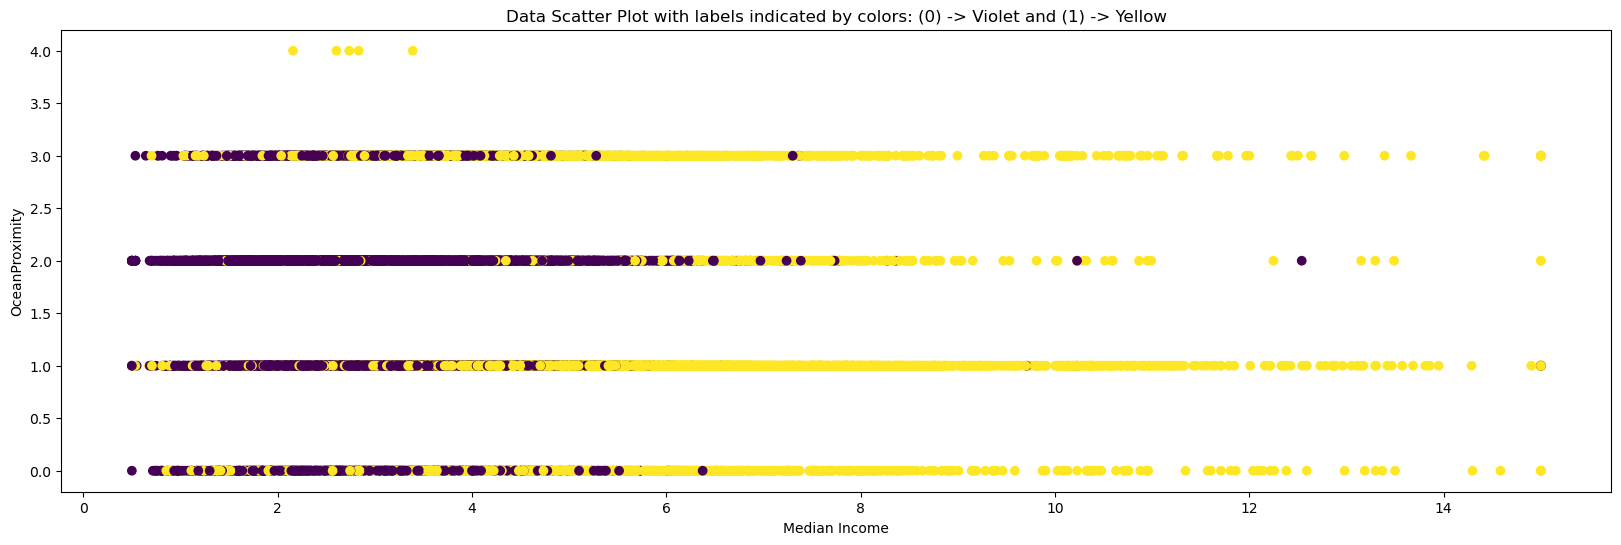

In [22]:
from matplotlib import pyplot as plt
import numpy as np
# Scatter Plot of Training and Test Set with labels indicated by colors

plt.figure(figsize = (20, 6))
plt.scatter(X['MedInc'], X['OceanProximityCategory'], c = y)
plt.xlabel('Median Income')
plt.ylabel('OceanProximity')
plt.title('Data Scatter Plot with labels indicated by colors: (0) -> Violet and (1) -> Yellow')
plt.show()

Now let's plot the learned decision boundary on top of the scatter plot.

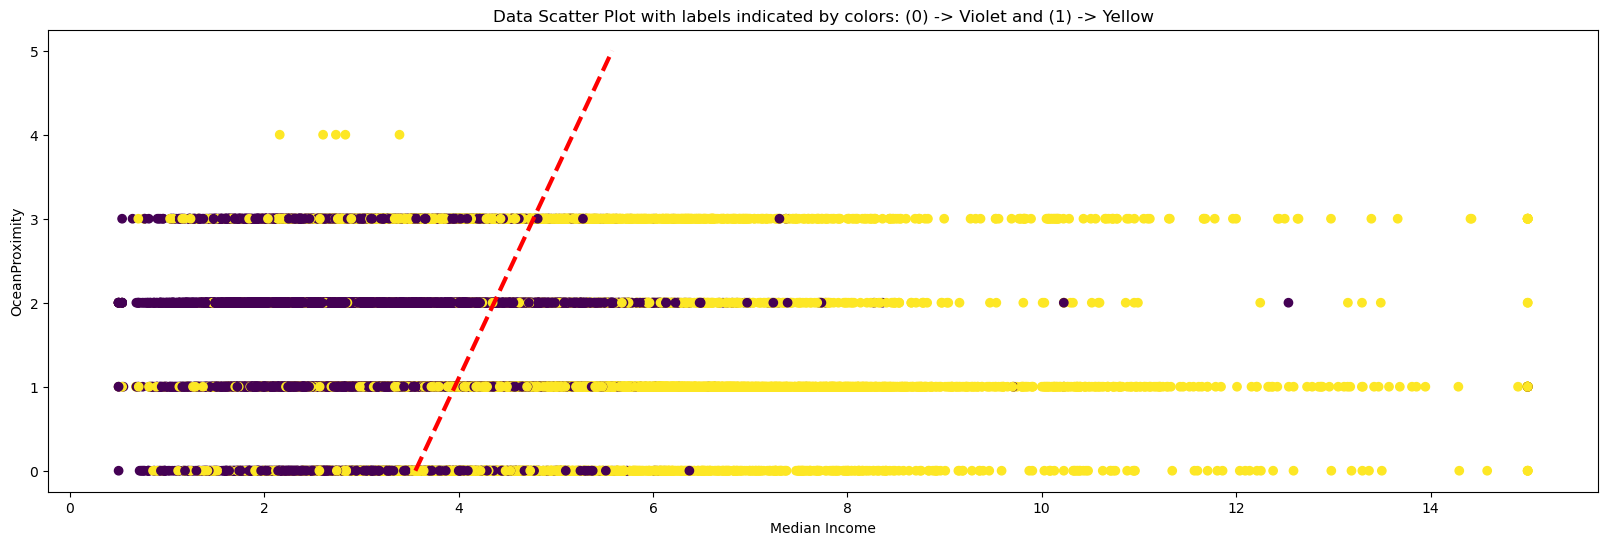

In [23]:
plt.figure(figsize = (20, 6))
plt.scatter(X['MedInc'], X['OceanProximityCategory'], c = y)
plt.xlabel('Median Income')
plt.ylabel('OceanProximity')
plt.title('Data Scatter Plot with labels indicated by colors: (0) -> Violet and (1) -> Yellow')

# Retrieve the model parameters.
b = reg.intercept_[0]
w1, w2 = reg.coef_.T

# Recall w1x1+w2x2+b = 0 => x2 = -w1x/w2 - b/w2
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = 0, 15
ymin, ymax = 0, 5
yd = np.array([ymin, ymax])
xd = (yd - c)/m
plt.plot(xd, yd, 'r', lw=3, ls='--')
plt.show()

From these plots we can observe that the original data is inherently not linearly seperable using the two predictors. This explains the limited performance of the Logisitic Regression model. We can also observe more mixed clusters in lower values of median income. In terms of interpreting results, these observations suggest that we should have less confidence in predictions made for lower Median Income samples. In terms of optimization, these observations suggest that inclusion of additional features and a non-linear model might be helpful.

#### The Confusion Matrix and Additional Performance Metrics

For scenarios where we have higher dimesional features, it becomes more difficult to directly plot out the decision boundary. Instead, we can make use of the Confusion Matrix to make observations about the results of the learned model.

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
train_cm = confusion_matrix(y_train, y_pred_train, labels=reg.classes_)
test_cm = confusion_matrix(y_test, y_pred_test, labels=reg.classes_)

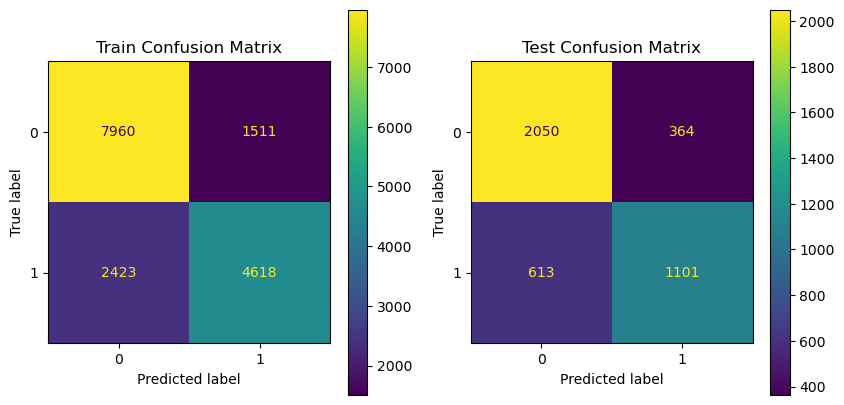

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=reg.classes_)
disp_train.plot(ax = axes[0])
disp_train.ax_.set_title("Train Confusion Matrix")

disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=reg.classes_)
disp_test.plot(ax = axes[1])
disp_test.ax_.set_title("Test Confusion Matrix")

plt.show()

As the name implies, from the Confusion Matrix we can observe the degree of confusion between classes. For the binary classification scenario, the matrix displays the True Negative (top left), False Positive (top right), False Negative (bottom left), True Positive (bottom right). For the matrices above, we can observe a significant number of False Positives.

To further intepret the impact of True/False Negatives and True/False Positives, we have the following performance metrics:

1. Precision: Percentage of correct positive predictions relative to total positive predictions. $\frac{TP}{TP+FP}$

2. Recall: Percentage of correct positive predictions relative to total actual positives. $\frac{TP}{TP+FN}$

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model. $\frac{2*Precision*Recall}{Precision+Recall}$

These metrics can be accessed using the ```classification_report``` method from $\texttt{sklearn}$.

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train)) #order!

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      9471
           1       0.75      0.66      0.70      7041

    accuracy                           0.76     16512
   macro avg       0.76      0.75      0.75     16512
weighted avg       0.76      0.76      0.76     16512



In [35]:
print(classification_report(y_test, y_pred_test)) #order!

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2414
           1       0.75      0.64      0.69      1714

    accuracy                           0.76      4128
   macro avg       0.76      0.75      0.75      4128
weighted avg       0.76      0.76      0.76      4128



We observe these metric in addition to accuracy because in real-world scenarios False Positive and False Negatives can have drastic consequences, for example a False Negative could be disastrous in disease diagnosis. Precision, Recall, and F-1 score can give us a more wholistic understanding of these cases.